
#Series RLC Circuit Simulation - Introduction
This notebook simulates a Series RLC circuit and analyzes its behavior over a range of frequencies. A Series RLC circuit consists of a resistor (R), inductor (L), and capacitor (C) connected in series. These circuits are widely used in signal processing, communication systems, and power electronics due to their frequency-dependent behavior.

The objective of this simulation is to study the variation of impedance, current, and phase angle as a function of frequency. One of the most important characteristics of an RLC circuit is resonance, where the inductive and capacitive reactances cancel out, leaving only the resistance. At this frequency, the circuit behaves as a pure resistor, allowing maximum current flow. Understanding this behavior is essential for designing filters, oscillators, and tuning circuits.

This notebook follows the methodology outlined in Lab 6, where experimental measurements of the circuit’s response were taken. Here, we will:

Simulate the theoretical response of the Series RLC circuit.

Compare the theoretical results with the experimental data obtained in Lab 6.

Analyze resonance behavior, including its impact on current and impedance.

Study phase angle variations, plotting how the phase shifts with frequency.

Create interactive phasor plots, visualizing the relationship between voltage, current, and impedance.


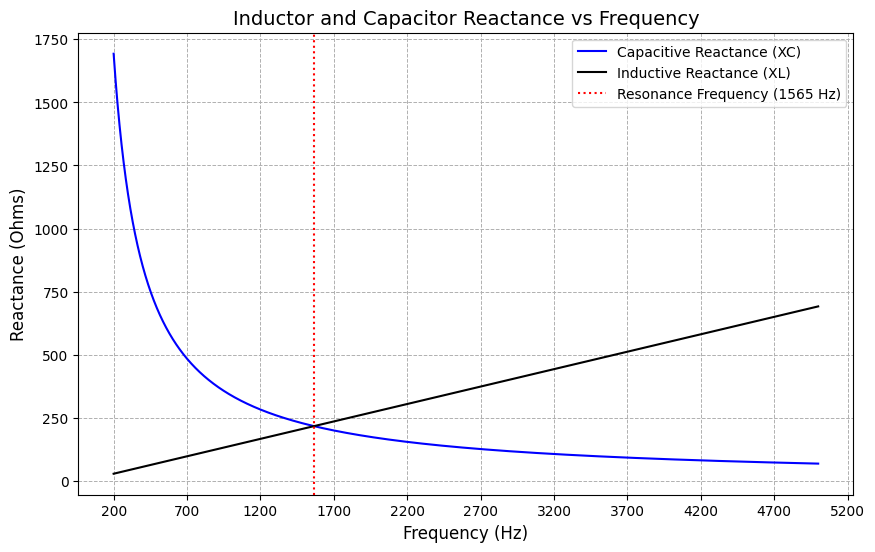

**Graph Description:**
This graph displays the reactance of an inductor (XL) and a capacitor (XC) as a function of frequency.
The x-axis represents frequency (Hz), and the y-axis represents reactance in ohms (Ω).

**Key Observations:**
1. Below resonance (200–1500 Hz): The capacitive reactance (XC) dominates, as seen by its higher values.
2. At resonance (~1565 Hz): The inductive and capacitive reactances are equal (XC = XL), resulting in reactive cancellation.
3. Above resonance (1600–5000 Hz): The inductive reactance (XL) dominates, increasing steadily with frequency.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Given values
Vs = 2  # Supply Voltage
R = 40  # Resistance in Ohms
L = 22e-3  # Inductance in Henrys
C = 0.470e-6  # Capacitance in Farads

# Frequency vector updated to start at 200 Hz
f = np.arange(200, 5001, 1)  # From 200 to 5000 Hz with 1 Hz increments

# Capacitive Reactance
XC = 1 / (2 * np.pi * f * C)

# Inductive Reactance
XL = 2 * np.pi * f * L

# Enhanced Plotting
plt.figure(figsize=(10, 6))
plt.plot(f, XC, label='Capacitive Reactance (XC)', color='blue', linestyle='-')
plt.plot(f, XL, label='Inductive Reactance (XL)', color='black', linestyle='-')

# Adding Resonance Frequency Line
resonance_frequency = 1 / (2 * np.pi * np.sqrt(L * C))  # Calculated Resonant Frequency
plt.axvline(resonance_frequency, color='red', linestyle=':', label=f'Resonance Frequency ({int(resonance_frequency)} Hz)')

# Graph Titles and Labels
plt.title('Inductor and Capacitor Reactance vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Reactance (Ohms)', fontsize=12)

# Grid, Legend, and Ticks
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(fontsize=10)
xticks = np.arange(200, 5500, 500)  # Custom x-axis ticks
plt.xticks(xticks)
plt.show()

# Adding Explanatory Text Below the Graph
print("**Graph Description:**")
print("This graph displays the reactance of an inductor (XL) and a capacitor (XC) as a function of frequency.")
print("The x-axis represents frequency (Hz), and the y-axis represents reactance in ohms (Ω).")
print("\n**Key Observations:**")
print("1. Below resonance (200–1500 Hz): The capacitive reactance (XC) dominates, as seen by its higher values.")
print("2. At resonance (~1565 Hz): The inductive and capacitive reactances are equal (XC = XL), resulting in reactive cancellation.")
print("3. Above resonance (1600–5000 Hz): The inductive reactance (XL) dominates, increasing steadily with frequency.")



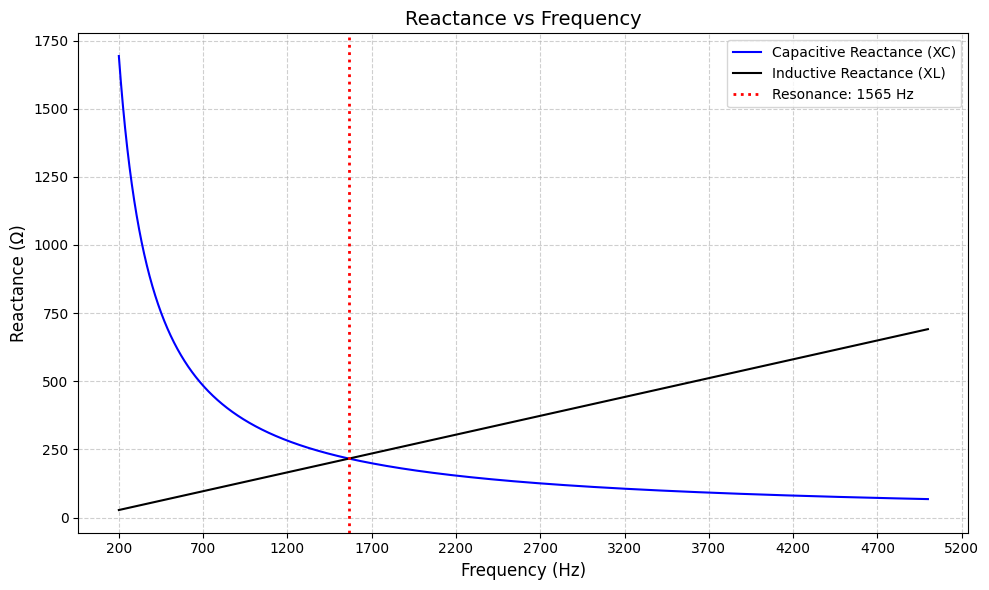


**Graph 1: Reactance vs Frequency**
- Shows how capacitive (XC) and inductive (XL) reactances change with frequency.
- X-axis: Frequency (Hz), Y-axis: Reactance (Ω)

**Key Observations:**
1. XC (blue) decreases with frequency: Capacitors "resist" low frequencies more.
2. XL (black) increases with frequency: Inductors "resist" high frequencies more.
3. Resonance occurs at 1565 Hz where XL = XC → Reactances cancel out.
4. Below resonance: XC dominates (circuit behaves capacitively).
5. Above resonance: XL dominates (circuit behaves inductively).



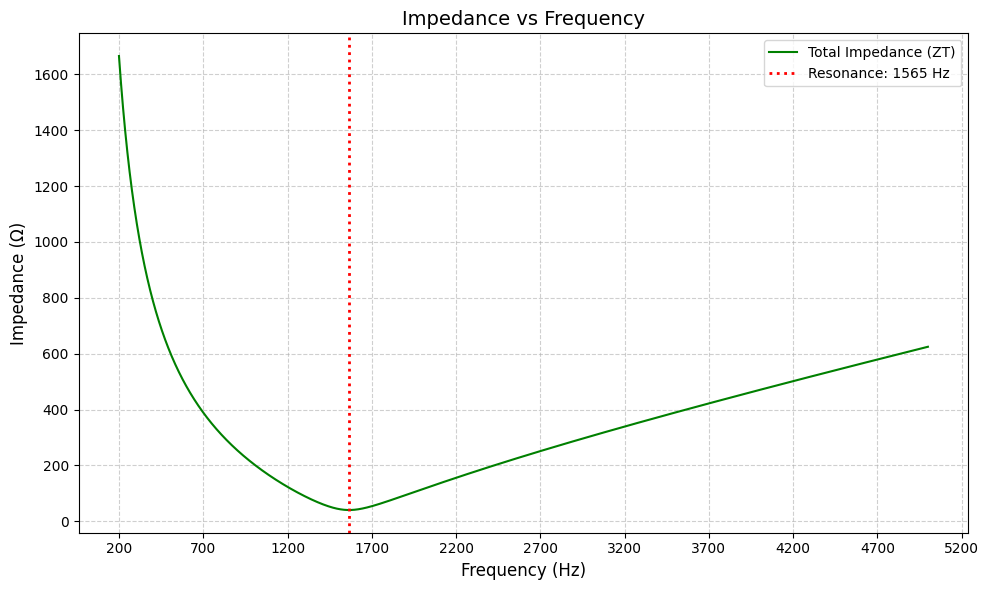


**Graph 2: Impedance vs Frequency**
- Shows total impedance (Z) of the series RLC circuit across frequencies.
- X-axis: Frequency (Hz), Y-axis: Impedance (Ω)

**Key Observations:**
1. Minimum impedance occurs at resonance (Z = R = 40Ω in ideal case).
2. Actual experimental Z is higher due to inductor resistance (see Graph 3).
3. Impedance curve is V-shaped → Shows frequency-dependent opposition to current.
4. Steepness of curve depends on L and C values (quality factor Q).



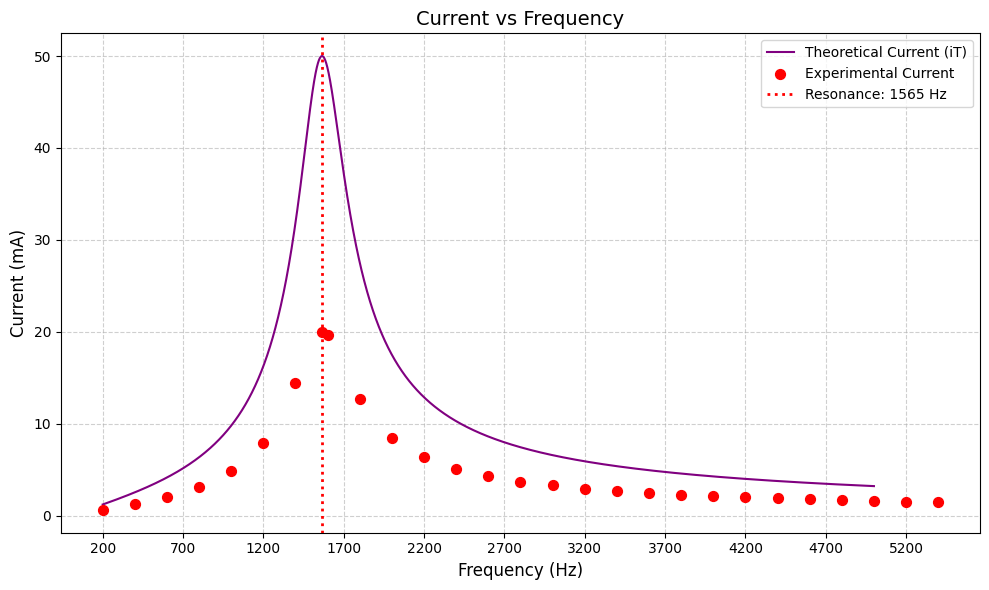


**Graph 3: Current vs Frequency**
- Compares theoretical vs experimental current in the RLC circuit.
- X-axis: Frequency (Hz), Y-axis: Current (mA)

**Key Observations:**
1. Current peaks at resonance (1565 Hz) → Minimum impedance → Maximum current.
2. Experimental peak (20 mA) is lower than theoretical prediction (50 mA):
   - Inductor's internal resistance adds to total resistance (R_total = 100Ω).
3. Asymmetry in current curve → Faster roll-off at high frequencies due to XL dominance.
4. Experimental data matches theory best near resonance → Non-ideal effects dominate at extremes.



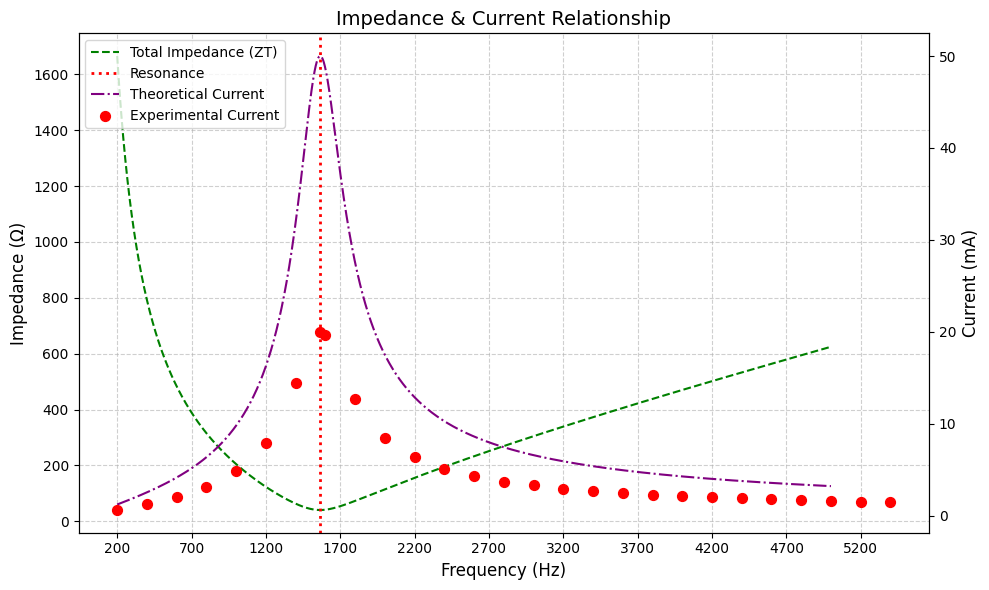


**Graph 4: Impedance & Current Relationship**
- Dual-axis plot showing inverse relationship between Z and I.
- Left Y-axis: Impedance (Ω), Right Y-axis: Current (mA)

**Key Observations:**
1. Current (purple) is inversely proportional to impedance (green).
2. Resonance frequency (red dashed line) aligns with:
   - Minimum impedance (green valley)
   - Maximum current (purple peak)
3. Experimental data (red dots) follows theoretical trend but with reduced amplitude.
4. Non-ideal behavior becomes apparent far from resonance (e.g., component tolerances, measurement errors).



In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Circuit Parameters
Vs = 2.0       # Supply voltage (V)
R = 40         # Resistance (Ω)
L = 22e-3      # Inductance (H)
C = 0.470e-6   # Capacitance (F)

# Frequency range
f = np.arange(200, 5001, 1)  # 200 Hz to 5 kHz

# Reactance Calculations
XC = 1 / (2 * np.pi * f * C)   # Capacitive Reactance
XL = 2 * np.pi * f * L         # Inductive Reactance

# Total Impedance (Series RLC)
ZT = R + 1j * (XL - XC)        # Series impedance formula
ZT_mag = np.abs(ZT)            # Magnitude of total impedance

# Current Calculation
iT = Vs / ZT                   # Total current (A)
iT_mag = np.abs(iT)            # Magnitude of total current
iT_mA = iT_mag * 1000          # Convert to milliamperes (mA)

# Resonance Frequency
resonance_freq = 1 / (2 * np.pi * np.sqrt(L * C))  # ~1565 Hz

# Experimental Data (From Lab 6)
f_exp = np.array([200, 400, 600, 800, 1000, 1200, 1400, 1565, 1600, 1800,
                  2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600,
                  3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400])

iT_exp_mA = np.array([0.600, 1.261, 2.066, 3.158, 4.842, 7.899, 14.377,
                      20.000, 19.647, 12.717, 8.457, 6.318, 5.073, 4.264,
                      3.693, 3.269, 2.939, 2.676, 2.459, 2.278, 2.123,
                      1.990, 1.874, 1.772, 1.680, 1.599, 1.525, 1.459])

# ... (Your existing code for parameters, calculations, and plotting remains the same)

# --------------------------
# Plot 1: Reactance (XL, XC) vs Frequency
# --------------------------
plt.figure(figsize=(10, 6))
plt.plot(f, XC, label='Capacitive Reactance (XC)', color='blue')
plt.plot(f, XL, label='Inductive Reactance (XL)', color='black')
plt.axvline(resonance_freq, color='red', linestyle=':', linewidth=2, label=f'Resonance: {int(resonance_freq)} Hz')
plt.title('Reactance vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Reactance (Ω)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(200, 5500, 500))
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("""
**Graph 1: Reactance vs Frequency**
- Shows how capacitive (XC) and inductive (XL) reactances change with frequency.
- X-axis: Frequency (Hz), Y-axis: Reactance (Ω)

**Key Observations:**
1. XC (blue) decreases with frequency: Capacitors "resist" low frequencies more.
2. XL (black) increases with frequency: Inductors "resist" high frequencies more.
3. Resonance occurs at 1565 Hz where XL = XC → Reactances cancel out.
4. Below resonance: XC dominates (circuit behaves capacitively).
5. Above resonance: XL dominates (circuit behaves inductively).
""")

# --------------------------
# Plot 2: Total Impedance vs Frequency
# --------------------------
plt.figure(figsize=(10, 6))
plt.plot(f, ZT_mag, label='Total Impedance (ZT)', color='green', linestyle='-')
plt.axvline(resonance_freq, color='red', linestyle=':', linewidth=2, label=f'Resonance: {int(resonance_freq)} Hz')
plt.title('Impedance vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Impedance (Ω)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(200, 5500, 500))
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("""
**Graph 2: Impedance vs Frequency**
- Shows total impedance (Z) of the series RLC circuit across frequencies.
- X-axis: Frequency (Hz), Y-axis: Impedance (Ω)

**Key Observations:**
1. Minimum impedance occurs at resonance (Z = R = 40Ω in ideal case).
2. Actual experimental Z is higher due to inductor resistance (see Graph 3).
3. Impedance curve is V-shaped → Shows frequency-dependent opposition to current.
4. Steepness of curve depends on L and C values (quality factor Q).
""")

# --------------------------
# Plot 3: Current vs Frequency (With Experimental Data)
# --------------------------
plt.figure(figsize=(10, 6))
plt.plot(f, iT_mA, label='Theoretical Current (iT)', color='purple', linestyle='-')
plt.scatter(f_exp, iT_exp_mA, color='red', marker='o', s=50, label='Experimental Current', zorder=5)
plt.axvline(resonance_freq, color='red', linestyle=':', linewidth=2, label=f'Resonance: {int(resonance_freq)} Hz')
plt.title('Current vs Frequency', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Current (mA)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(200, 5500, 500))
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("""
**Graph 3: Current vs Frequency**
- Compares theoretical vs experimental current in the RLC circuit.
- X-axis: Frequency (Hz), Y-axis: Current (mA)

**Key Observations:**
1. Current peaks at resonance (1565 Hz) → Minimum impedance → Maximum current.
2. Experimental peak (20 mA) is lower than theoretical prediction (50 mA):
   - Inductor's internal resistance adds to total resistance (R_total = 100Ω).
3. Asymmetry in current curve → Faster roll-off at high frequencies due to XL dominance.
4. Experimental data matches theory best near resonance → Non-ideal effects dominate at extremes.
""")

# --------------------------
# Plot 4: Combined Impedance & Current
# --------------------------
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(f, ZT_mag, label='Total Impedance (ZT)', color='green', linestyle='--')
ax1.set_xlabel('Frequency (Hz)', fontsize=12)
ax1.set_ylabel('Impedance (Ω)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.axvline(resonance_freq, color='red', linestyle=':', linewidth=2, label='Resonance')

ax2 = ax1.twinx()
ax2.plot(f, iT_mA, label='Theoretical Current', color='purple', linestyle='-.')
ax2.scatter(f_exp, iT_exp_mA, color='red', marker='o', s=50, label='Experimental Current', zorder=5)
ax2.set_ylabel('Current (mA)', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=10, loc='upper left')

plt.title('Impedance & Current Relationship', fontsize=14)
plt.xticks(np.arange(200, 5500, 500))
plt.tight_layout()
plt.show()

print("""
**Graph 4: Impedance & Current Relationship**
- Dual-axis plot showing inverse relationship between Z and I.
- Left Y-axis: Impedance (Ω), Right Y-axis: Current (mA)

**Key Observations:**
1. Current (purple) is inversely proportional to impedance (green).
2. Resonance frequency (red dashed line) aligns with:
   - Minimum impedance (green valley)
   - Maximum current (purple peak)
3. Experimental data (red dots) follows theoretical trend but with reduced amplitude.
4. Non-ideal behavior becomes apparent far from resonance (e.g., component tolerances, measurement errors).
""")


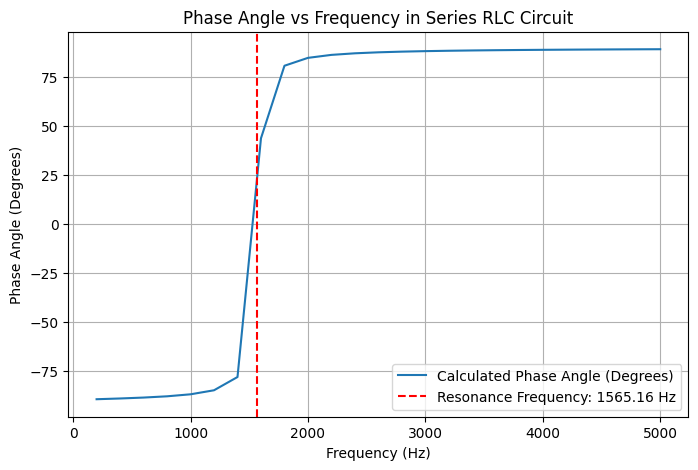

**Graph 5: Phase Angle vs Frequency**
- Shows the phase shift between voltage and current in the series RLC circuit.
- X-axis: Frequency (Hz), Y-axis: Phase Angle (Degrees)

**Key Observations:**
1. Below resonance (~1565 Hz): Phase angle is negative (capacitive circuit behavior).
2. At resonance (~1565 Hz): Phase angle is 0° (voltage and current are in phase).
3. Above resonance: Phase angle is positive (inductive circuit behavior).


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from ipywidgets import interact

# Given circuit parameters
R = 10  # Resistance in ohms
L = 22e-3  # Inductance in Henry
C = 0.47e-6  # Capacitance in Farads

# Frequency range
frequencies = np.arange(200, 5001, 200)  # 200 Hz to 5 kHz in steps of 200 Hz
omega = 2 * np.pi * frequencies

# Impedance calculations
Z_R = R
Z_L = 1j * omega * L
Z_C = 1 / (1j * omega * C)
Z_total = Z_R + Z_L + Z_C

# Current Calculation (Assume Vin = 2V RMS)
Vin = 2
I = Vin / np.abs(Z_total)

# Resonant Frequency Calculation
f_resonance = 1 / (2 * np.pi * np.sqrt(L * C))

# Phase Angle Calculation
phase_angle = np.angle(Z_total, deg=True)

# Phase Angle Plot
plt.figure(figsize=(8, 5))
plt.plot(frequencies, phase_angle, label='Calculated Phase Angle (Degrees)')
plt.axvline(f_resonance, color='r', linestyle='--', label=f'Resonance Frequency: {f_resonance:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Angle (Degrees)')
plt.title('Phase Angle vs Frequency in Series RLC Circuit')
plt.legend()
plt.grid()
plt.show()

# Phase Angle Observations
print("**Graph 5: Phase Angle vs Frequency**")
print("- Shows the phase shift between voltage and current in the series RLC circuit.")
print("- X-axis: Frequency (Hz), Y-axis: Phase Angle (Degrees)")
print("\n**Key Observations:**")
print("1. Below resonance (~{:.0f} Hz): Phase angle is negative (capacitive circuit behavior).".format(f_resonance))
print("2. At resonance (~{:.0f} Hz): Phase angle is 0° (voltage and current are in phase).".format(f_resonance))
print("3. Above resonance: Phase angle is positive (inductive circuit behavior).".format(f_resonance))



In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Given Circuit Parameters for Lab 6
Vs = 2.0  # Supply voltage (V)
R = 40  # Resistance (Ω)
L = 22e-3  # Inductance (H)
C = 0.470e-6  # Capacitance (F)

# Frequency range
f = np.arange(200, 5001, 1)  # 200 Hz to 5 kHz
omega = 2 * np.pi * f  # Angular frequency

# Total Impedance Calculation (Series RLC)
Z_total = R + 1j * (omega * L - 1 / (omega * C))  # Series impedance

# Resonance Frequency
resonance_freq = 1 / (2 * np.pi * np.sqrt(L * C))  # Theoretical resonance frequency

# Function to plot impedance phasor at a given frequency
def plot_impedance_phasor(frequency=200):
    plt.figure(figsize=(6, 6))

    # Find the closest frequency index
    index = np.argmin(np.abs(f - frequency))

    # Extract the complex value for the calculated index
    ZT_val = Z_total[index]  # Single impedance value at given frequency

    # Logarithmic plot of the phasor
    ZT_val_mag_log = np.log10(np.abs(ZT_val))
    ZT_val_angle = np.angle(ZT_val)
    ZT_val_log = ZT_val_mag_log * (np.cos(ZT_val_angle) + 1j * np.sin(ZT_val_angle))
    plt.quiver(0, 0, ZT_val_log.real, ZT_val_log.imag, angles='xy', scale_units='xy', scale=1, color='black', width=0.01, label='Total Impedance (ZT)')

    # Formatting the plot
    plt.xlim(-3.1, 3.1)
    plt.ylim(-3.1, 3.1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.title(f'Impedance Phasor (Log10) at Frequency: {frequency} Hz')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()  # Display the legend
    plt.show()

# Create an interactive slider for frequency
interact(plot_impedance_phasor, frequency=IntSlider(min=200, max=5000, step=50, value=200, description='Frequency (Hz)'))

# Explanation
print("**Graph: Interactive Impedance Phasor Diagram**")
print("This interactive graph displays the phasor representation of total impedance (ZT) at different frequencies.")
print("\n**Key Observations:**")
print("1. **Below resonance (~{} Hz):** ZT is dominated by capacitive reactance (negative imaginary part).".format(int(resonance_freq)))
print("2. **At resonance (~{} Hz):** ZT is purely real (only resistance remains, reactance cancels out).".format(int(resonance_freq)))
print("3. **Above resonance:** ZT is dominated by inductive reactance (positive imaginary part).")
print("4. The impedance angle shifts from negative (capacitive) to positive (inductive) as frequency increases.")



interactive(children=(IntSlider(value=200, description='Frequency (Hz)', max=5000, min=200, step=50), Output()…

**Graph: Interactive Impedance Phasor Diagram**
This interactive graph displays the phasor representation of total impedance (ZT) at different frequencies.

**Key Observations:**
1. **Below resonance (~1565 Hz):** ZT is dominated by capacitive reactance (negative imaginary part).
2. **At resonance (~1565 Hz):** ZT is purely real (only resistance remains, reactance cancels out).
3. **Above resonance:** ZT is dominated by inductive reactance (positive imaginary part).
4. The impedance angle shifts from negative (capacitive) to positive (inductive) as frequency increases.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Given Circuit Parameters for Lab 6
Vs = 2.0  # Supply voltage (V)
R = 40  # Resistance (Ω)
L = 22e-3  # Inductance (H)
C = 0.470e-6  # Capacitance (F)

# Frequency range
f = np.arange(200, 5001, 1)  # 200 Hz to 5 kHz
omega = 2 * np.pi * f  # Angular frequency

# Impedance Calculation for Series RLC
Z_R = R
Z_L = 1j * omega * L
Z_C = 1 / (1j * omega * C)
Z_total = Z_R + Z_L + Z_C  # Total impedance in series circuit

# Current Calculation
iT = Vs / Z_total  # Total current in series circuit (A)
iT_mag = np.abs(iT) * 1000  # Convert current magnitude to milliamps (mA)
iT_angle = np.angle(iT)  # Phase angle in radians

# Resonance Frequency
resonance_freq = 1 / (2 * np.pi * np.sqrt(L * C))  # Theoretical resonance frequency

# Function to plot voltage and current phasors at a given frequency
def plot_voltage_current_phasor(frequency=200):
    plt.figure(figsize=(6, 6))

    # Find the closest frequency index
    index = np.argmin(np.abs(f - frequency))

    # Voltage Phasor (Reference)
    v_mag = np.log10(np.abs(Vs))  # Log scale magnitude for better visualization
    v_angle = 0  # Voltage is the reference (0° phase)
    v_log = v_mag * (np.cos(v_angle) + 1j * np.sin(v_angle))
    plt.quiver(0, 0, v_log.real, v_log.imag, angles='xy', scale_units='xy', scale=1, color='orange', width=0.01, label='Voltage (Vs)')

    # Current Phasor (iT)
    iT_mag_log = np.log10(iT_mag[index])  # Log scale for visualization
    iT_angle_rad = iT_angle[index]  # Phase angle in radians
    iT_log = iT_mag_log * (np.cos(iT_angle_rad) + 1j * np.sin(iT_angle_rad))
    plt.quiver(0, 0, iT_log.real, iT_log.imag, angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='Current (iT)')

    # Formatting the plot
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.title(f'Voltage and Current Phasors at Frequency: {frequency} Hz')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Create an interactive slider for frequency
interact(plot_voltage_current_phasor, frequency=IntSlider(min=200, max=5000, step=50, value=200, description='Frequency (Hz)'))

# Explanation
print("**Graph: Animated Voltage and Current Phasor Diagram**")
print("This interactive graph visualizes the relationship between voltage and current phasors as frequency changes.")
print("- The **orange arrow** represents the voltage phasor (Vs), which is the reference and remains constant in phase.")
print("- The **red arrow** represents the total current phasor (iT), which varies in magnitude and phase with frequency.")
print("\n**Key Observations:**")
print("1. **Below resonance (~{} Hz)**: The current (iT) lags the voltage due to capacitive reactance.".format(int(resonance_freq)))
print("2. **At resonance (~{} Hz)**: The current (iT) is in phase with the voltage as the reactive effects cancel out.".format(int(resonance_freq)))
print("3. **Above resonance**: The current (iT) leads the voltage due to inductive reactance.")
print("4. The magnitude and phase of the current phasor provide insights into the circuit's behavior at different frequencies.")



interactive(children=(IntSlider(value=200, description='Frequency (Hz)', max=5000, min=200, step=50), Output()…

**Graph: Animated Voltage and Current Phasor Diagram**
This interactive graph visualizes the relationship between voltage and current phasors as frequency changes.
- The **orange arrow** represents the voltage phasor (Vs), which is the reference and remains constant in phase.
- The **red arrow** represents the total current phasor (iT), which varies in magnitude and phase with frequency.

**Key Observations:**
1. **Below resonance (~1565 Hz)**: The current (iT) lags the voltage due to capacitive reactance.
2. **At resonance (~1565 Hz)**: The current (iT) is in phase with the voltage as the reactive effects cancel out.
3. **Above resonance**: The current (iT) leads the voltage due to inductive reactance.
4. The magnitude and phase of the current phasor provide insights into the circuit's behavior at different frequencies.
